# Analysys of population of Italy for 2013 year


### Content
+ <a href='#1'>Introduction</a>  
+ <a href='#2'>Data description and objectives </a>
    + <a href='#2.1'>Data description</a>
    + <a href='#2.2'>Objectives </a>
+ <a href='#3'>Data manipulation and validation </a>
+ <a href='#4'>Data analysis and visualisation </a>
    + <a href='#4.1'>1. Analyze 10 most populous cities and vice versa</a>
    + <a href='#4.2'>2. Analyze the number of local residents living without any old degree or new system university degrees</a>
    + <a href='#4.3'>3. Understand which gender prevails in a given province at the time of research</a>
    + <a href='#4.4'>4. Сalculate the oldest province based on the number of buildings built at the beginning of the last century</a>
    + <a href='#4.5'>5. Analyze the material of the houses built and compare them with the material used at the beginning of the last century</a>
+ <a href='#5'>Conclusion</a>

## <a id='1'>1. Introduction</a>


### Provinces of Italy

The provinces of Italy (Italian: Province d'Italia) are the constituent entities of the Italian Republic, on an intermediate level between a municipality (comune) and a region (regione). Since 2015, provinces have been classified as ‘institutional bodies of second level’.

There are currently 107 institutional bodies of second level in Italy, including 80 ordinary provinces, 2 autonomous provinces, 4 regional decentralization entities, 6 free municipal consortia, and 14 metropolitan cities, including the Aosta Valley region.

The three main functions devolved to provinces are:
+ local planning and zoning;
+ provision of local police and fire services;
+ transportation regulation (car registration, maintenance of local roads, etc.).

Source(https://en.wikipedia.org/wiki/Provinces_of_Italy)

## <a id='2'>2. Data description and objectives</a>
### <a id='2.1'>a. Data description</a>

The analysis below would be based on the "Mobile phone activity in a city" Kaggle dataset(https://www.kaggle.com/marcodena/mobile-phone-activity) initially gathered by Marco De Nadai, who used census data provided by the Italian National Institute of Statistics (ISTAT) (http://www.istat.it/en/), a public research organization and the main provider of official statistics in Italy. The dataset was updated 7 times and the last update was a year ago.

The main topic of the dataset was the hourly activity of cell phones in Italy, but my current analysis provides data on the population. Archive of the dataset consists of 16 .csv files but the major and the most data-rich part for analyzing Italy population is in the ISTAT_census_variables_2011.csv. Other files consist of 1 million records of hourly phone calls, SMS, Mb of internet used.From my point of you, I have lots of opportunities to grow of my analysis, using info from other .csv and by scrapping from the wikipedia to construct the maps. The following parameters from ISTAT_census_variables_2011.csv will be used:
+ PROVINCIA -  Name of the province (Given in Italian)
+ P1 - Total resident population
+ ST1 - Foreigners and stateless persons residing in Italy 
+ P2 - Male residents
+ P3 - Female resident
+ P4 - Unmarried residents
+ P9 - Unmarried male residents
+ E6 - Buildings for residential use in reinforced concrete
+ E7 - Buildings for residential use in other materials (steel, wood, etc.)
+ E8 - Residential buildings built before 1919
+ P47 - Resident population with university degrees

### <a id='2.2'>b. Objectives</a>
For this project, data analysis contains 5 parts:

+ <a href='#4.1'>1. Analyze 10 most populous cities and vice versa</a>
+ <a href='#4.2'>2. Analyze the number of local residents living without any old degree or new system university degrees</a>
+ <a href='#4.3'>3. Understand which gender prevails in a given province at the time of research</a>
+ <a href='#4.4'>4. Сalculate the oldest province based on the number of buildings built at the beginning of the last century</a>
+  <a href='#4.5'>5. Analyze the material of the houses built and compare them with the material used at the beginning of the last century</a>

## <a id='3'>3. Data manipulation and validation</a>

In [440]:
# First of all, import the pandas, matplotlib and seaborn modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
# retrieve all data from csv file
data = pd.read_csv("ISTAT_census_variables_2011.csv")


data.shape
# now we can see that here 110 rows and 135 columns

(110, 135)

In [442]:
#showing only first 5 rows
data.head()

,PROVINCIA,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27
0,Alessandria,427229,204983,222246,158222,198253,11481,44582,14691,85839,...,82121,27855,7197,84634,23155,10813,5564,2523,1896,280402
1,Asti,217573,105370,112203,82119,102538,5404,20767,6745,44773,...,49604,11716,3039,48074,12510,4775,2083,1194,786,134452
2,Biella,182192,86821,95371,69188,82431,5266,18474,6833,37017,...,25523,19595,5795,35030,11310,4776,2066,974,581,112204
3,Cuneo,586378,287786,298592,231452,276983,12473,49417,16053,127243,...,113200,43780,10393,106446,41341,18356,8181,3449,2278,402507
4,Novara,365559,176361,189198,143302,170741,9351,31811,10354,76929,...,40028,25384,5773,39561,22413,10224,4404,2272,1148,199727


In [443]:
data.isnull().sum()

PROVINCIA    0
P1           0
P2           0
P3           0
P4           0
            ..
E23          0
E24          0
E25          0
E26          0
E27          0
Length: 135, dtype: int64

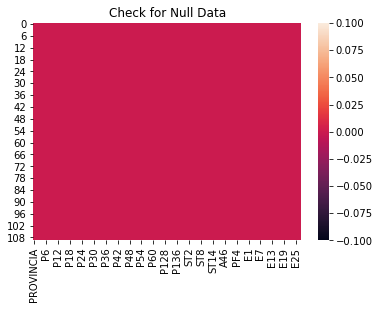

In [444]:
#let's just check via graph.
sns.heatmap(data.isnull()).set(title = 'Check for Null Data');


In [445]:
data.dropna()
#Deleting the null values

,PROVINCIA,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27
0,Alessandria,427229,204983,222246,158222,198253,11481,44582,14691,85839,...,82121,27855,7197,84634,23155,10813,5564,2523,1896,280402
1,Asti,217573,105370,112203,82119,102538,5404,20767,6745,44773,...,49604,11716,3039,48074,12510,4775,2083,1194,786,134452
2,Biella,182192,86821,95371,69188,82431,5266,18474,6833,37017,...,25523,19595,5795,35030,11310,4776,2066,974,581,112204
3,Cuneo,586378,287786,298592,231452,276983,12473,49417,16053,127243,...,113200,43780,10393,106446,41341,18356,8181,3449,2278,402507
4,Novara,365559,176361,189198,143302,170741,9351,31811,10354,76929,...,40028,25384,5773,39561,22413,10224,4404,2272,1148,199727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Nuoro,159197,78154,81043,74898,67875,2486,12001,1937,40032,...,22818,18454,4138,33567,12120,6029,1628,595,199,98881
106,Ogliastra,57329,28300,29029,27160,24615,698,4255,601,14585,...,9258,7464,3369,14406,5742,2935,845,140,22,42431
107,Olbia-Tempio,150501,74387,76114,67225,66825,3684,9461,3306,35734,...,27559,8200,1809,35090,13832,7508,3859,1180,650,143621
108,Oristano,163916,80482,83434,73203,72622,3033,12615,2443,39223,...,39001,10916,1406,55321,9822,2946,962,359,141,98544


In [446]:
data.shape
#we can see that shape has not changed. It means we had no null values

(110, 135)

## <a id = '4'>4. Data analysis and visualisation</a>

### <a id='4.1'>1. Analyze 10 most populous cities and vice versa</a>

In [447]:
# creating list of columns where we can see only neccesarry information which is name of the
#Province and number of people living there
col_list = ["PROVINCIA","P1"]

# creating new variable for further sorting
population = pd.read_csv('ISTAT_census_variables_2011.csv',usecols=col_list)

#sorting by the number of residents in ascending order
top = population.sort_values(by='P1',ascending=0)

# here we can see top 10 most populous province in the Italy
top.rename(columns={'PROVINCIA': 'Province','P1': 'Population'}).head(10)


,Province,Population
67,Roma,3997465
78,Napoli,3054956
16,Milano,3038420
5,Torino,2247780
80,Bari,1247303
98,Palermo,1243585
10,Brescia,1238044
79,Salerno,1092876
9,Bergamo,1086277
95,Catania,1078766


Now lets observe least populous province of Italy

In [448]:
# It is also possible to write only top.tail(10)
# but i desided to create another variable because it it more convenient to observe which province 
# have the smallest population

# but now we order in descending order, so thats why here is 1
top2 = population.sort_values(by='P1',ascending=1)
top2.rename(columns={'PROVINCIA': 'Province','P1': 'Population'}).head(10)


,Province,Population
106,Ogliastra,57329
74,Isernia,87241
104,Medio Campidano,101256
8,Valle d'Aosta/Vallée d'Aoste,126806
103,Carbonia-Iglesias,128540
30,Gorizia,140143
107,Olbia-Tempio,150501
66,Rieti,155164
105,Nuoro,159197
6,Verbano-Cusio-Ossola,160264


In [449]:
# create a dataframe called df
df = pd.DataFrame(pd.read_csv("ISTAT_census_variables_2011.csv"))

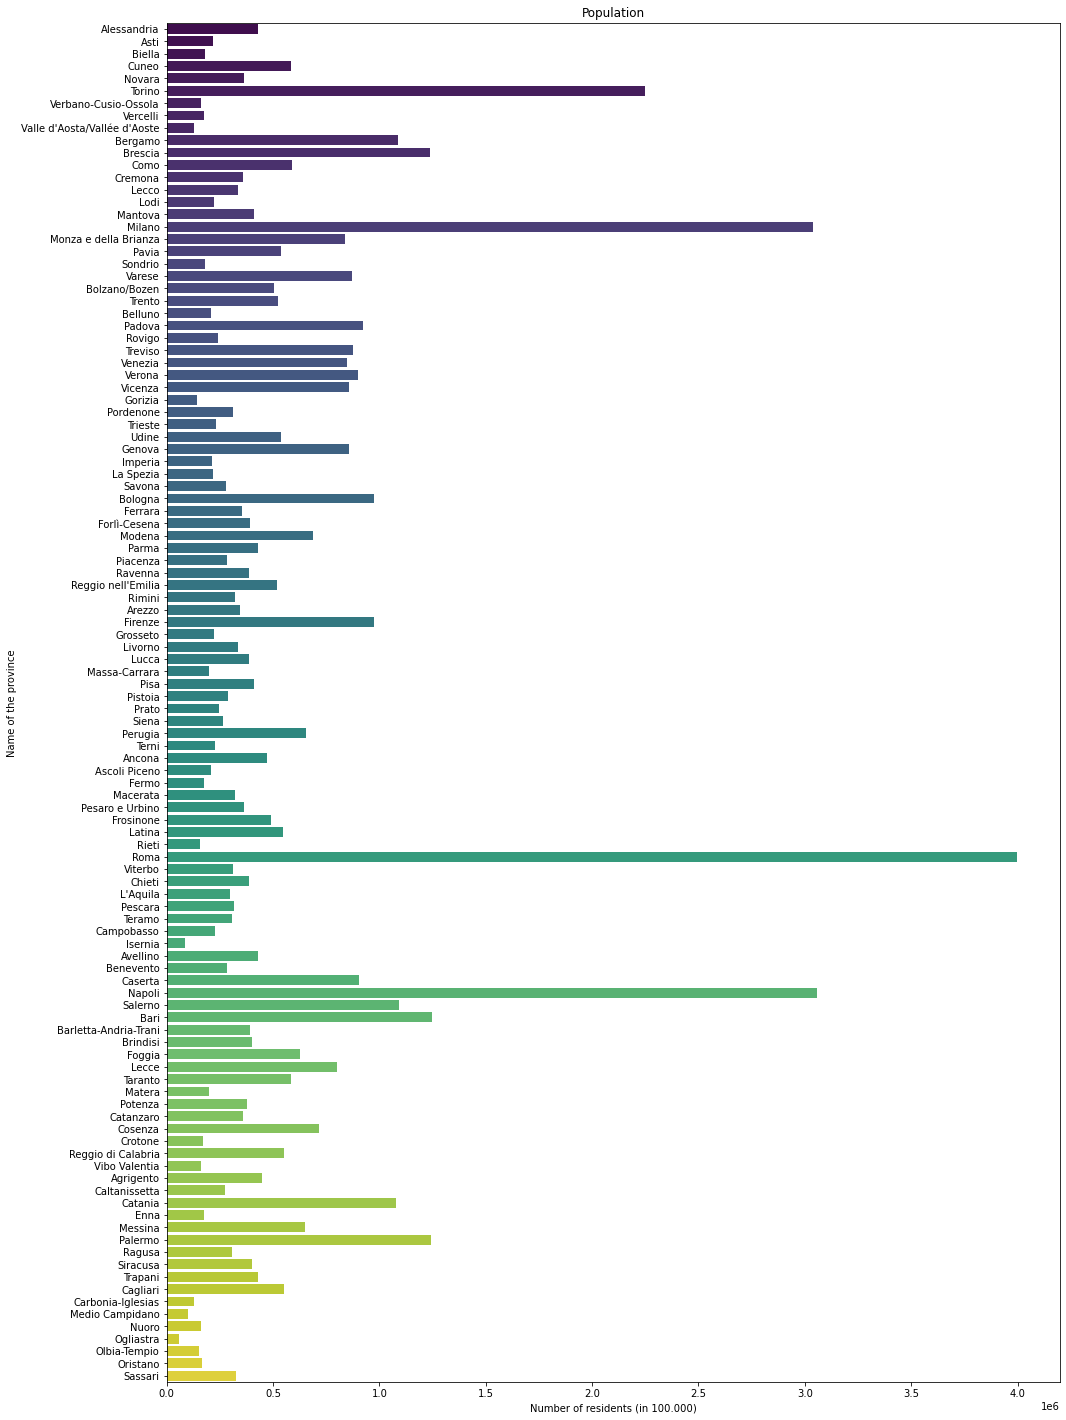

In [450]:
# creating new DataFrame for population.
pop_order = pd.DataFrame(top)
fig,(ax1) = plt.subplots(1,1,figsize = (16,25))
plt.title('Population')

graph1 = sns.barplot(data=df #data = pop_order - if we use pop_order dataFrame our graph will be ordered 
                     , y='PROVINCIA', x='P1', ax= ax1, palette='viridis'
                     #,log = 'false' -  trying to make x axis more readible I
                    );

#giving proper name to the axes.
graph1.set_ylabel('Name of the province');
graph1.set_xlabel('Number of residents (in 100.000)');

#graph1.set(xscale="linear");  trying to make x axis more readible II

In [451]:
#looks kinda messy, lets order them in ascending order

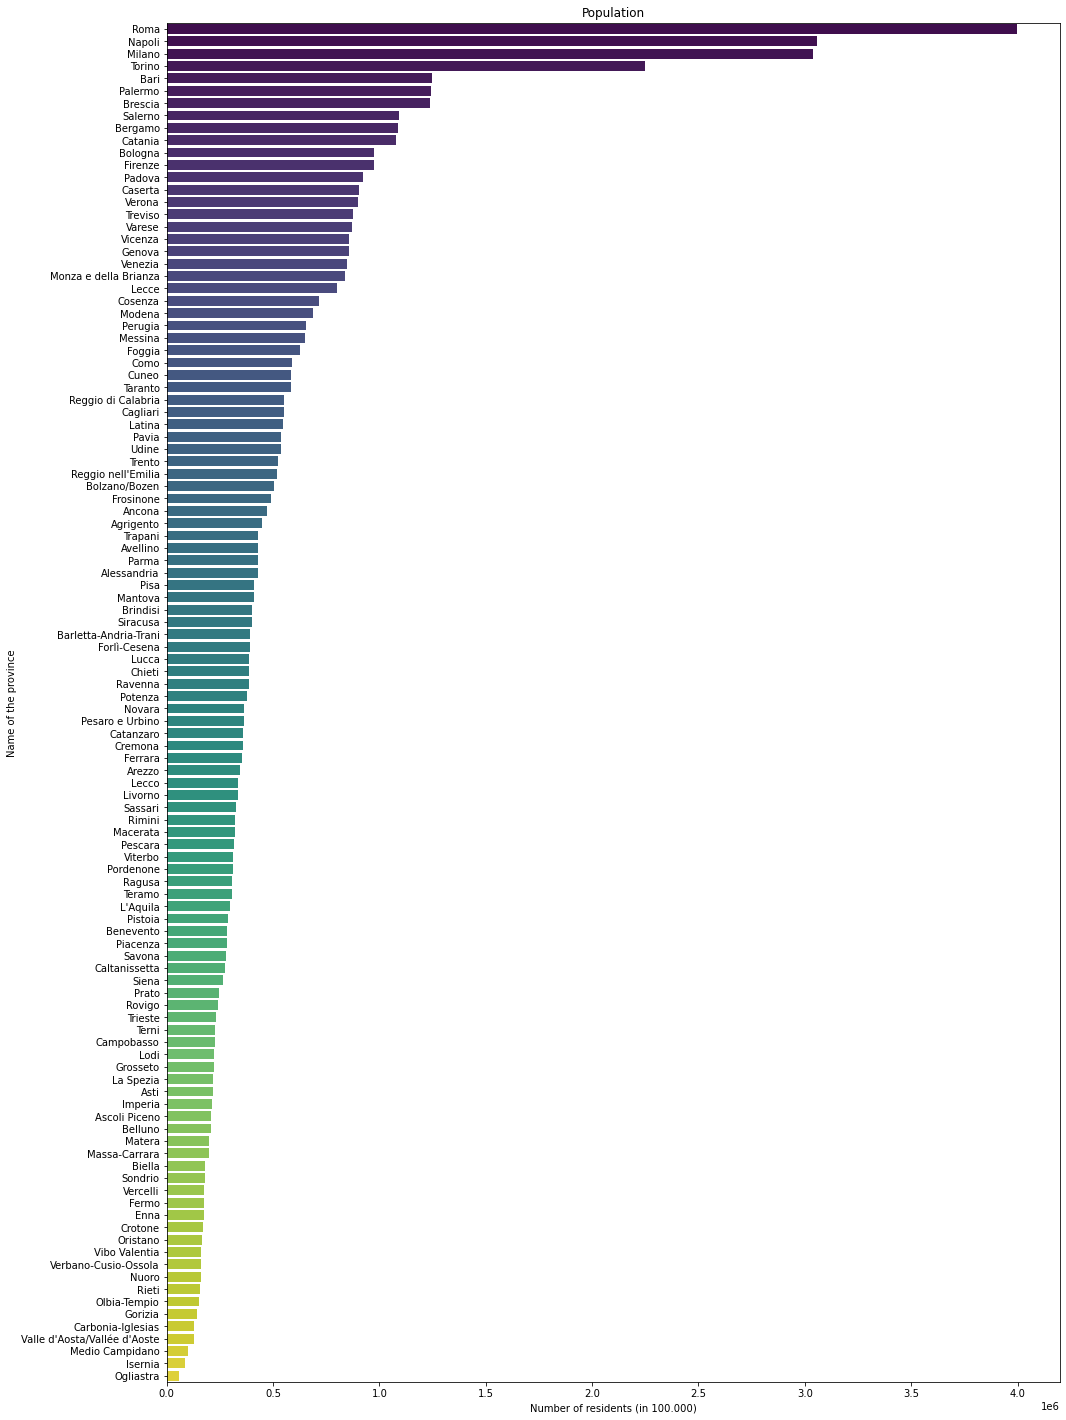

In [452]:
fig,(ax1) = plt.subplots(1,1,figsize = (16,25))
plt.title('Population')

graph1ordered = sns.barplot(data=pop_order, y='PROVINCIA', x='P1', ax= ax1, palette='viridis');

#giving proper name to the axes.
graph1ordered.set_ylabel('Name of the province');
graph1ordered.set_xlabel('Number of residents (in 100.000)');



In [453]:
# now it is clearly seen that in Rome, as a capital, population is the highest and in the Ogliastra is the lowest.


### <a id='4.2'>2. Analyze the number of local residents living without any old degree or new system university degrees</a>

In [454]:
## Creating a variable to safe the result of substraction columns. 
## Calculating local residents by substracting foreigners from total population
natives = df["P1"] - df["ST1"]

## calcultating local residets who don't have degree at universities
no_edu = natives - df["P47"]

## creating dataframe and adding there amount of not educated natives
not_educated = pd.DataFrame(no_edu)

## adding new variable to the dataframe
df = df.assign(not_educated=not_educated.values)

## gaining only neccesary columns
df2 = df[['PROVINCIA', 'P1', 'not_educated']]

## sorting by amount of people
result = df2.sort_values(by='not_educated',ascending=0)

## giving labels to the columns and retrieving first 10 rows
result.rename(columns={'PROVINCIA': 'Province','P1': 'Population','not_educated': 'Non-Educated Native'}).head(10)



,Province,Population,Non-Educated Native
67,Roma,3997465,3022510
78,Napoli,3054956,2706805
16,Milano,3038420,2266784
5,Torino,2247780,1820855
98,Palermo,1243585,1101451
80,Bari,1247303,1092310
10,Brescia,1238044,981879
95,Catania,1078766,958740
79,Salerno,1092876,947071
9,Bergamo,1086277,886112


In [455]:
## By using descending order and creating amother dataframe we can observe province with the lowest amount 
## of non-educated residents.
result2 = df2.sort_values(by='not_educated',ascending=1)

## giving alias names and also retrieve top 10 "educated" provinces
result2.rename(columns={'PROVINCIA': 'Province','P1': 'Population','not_educated': 'Non-Educated Native'}).head(10)


,Province,Population,Non-Educated Native
106,Ogliastra,57329,52179
74,Isernia,87241,74778
104,Medio Campidano,101256,94742
8,Valle d'Aosta/Vallée d'Aoste,126806,105850
30,Gorizia,140143,115682
103,Carbonia-Iglesias,128540,118753
66,Rieti,155164,130199
107,Olbia-Tempio,150501,131341
6,Verbano-Cusio-Ossola,160264,139124
61,Fermo,174857,142473


In [456]:
# adding the result column, to our new dataFrame.
not_educated = pd.DataFrame(result)

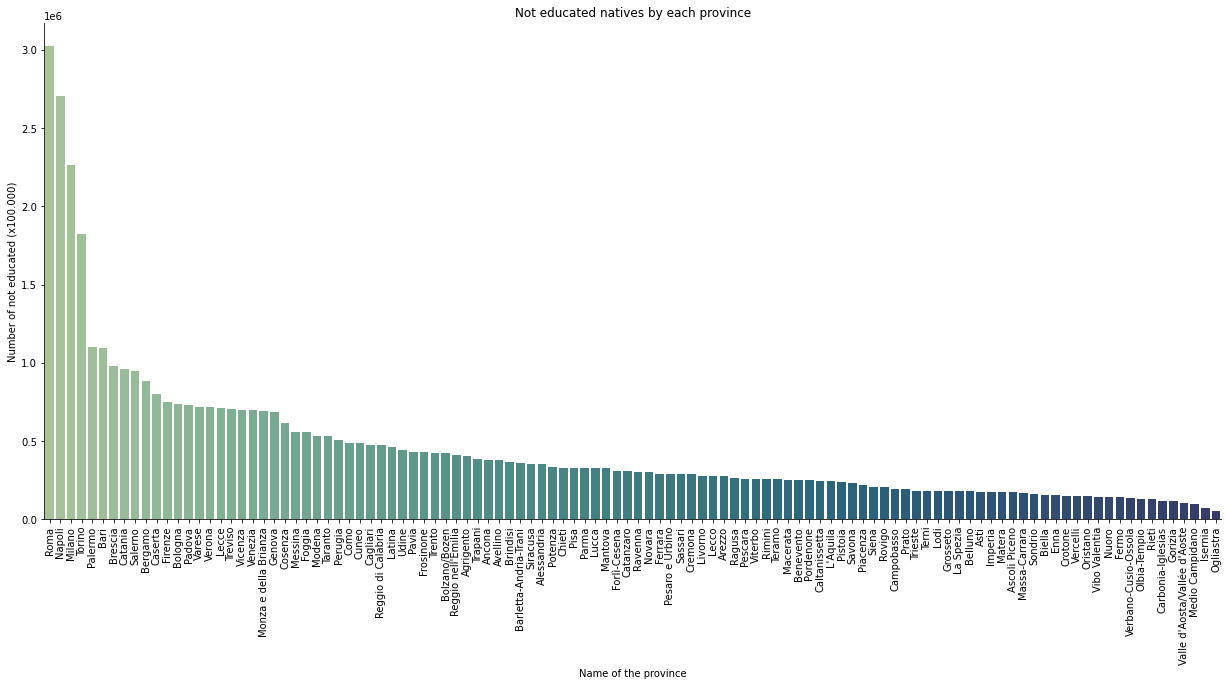

In [457]:
graph2 = sns.catplot(x="PROVINCIA", y="not_educated", data=not_educated, kind="bar",palette='crest')
graph2.fig.set_size_inches(23,8)

plt.xticks(rotation=90)
plt.title('Not educated natives by each province')
plt.xlabel ('Name of the province')
plt.ylabel ('Number of not educated (x100.000)');

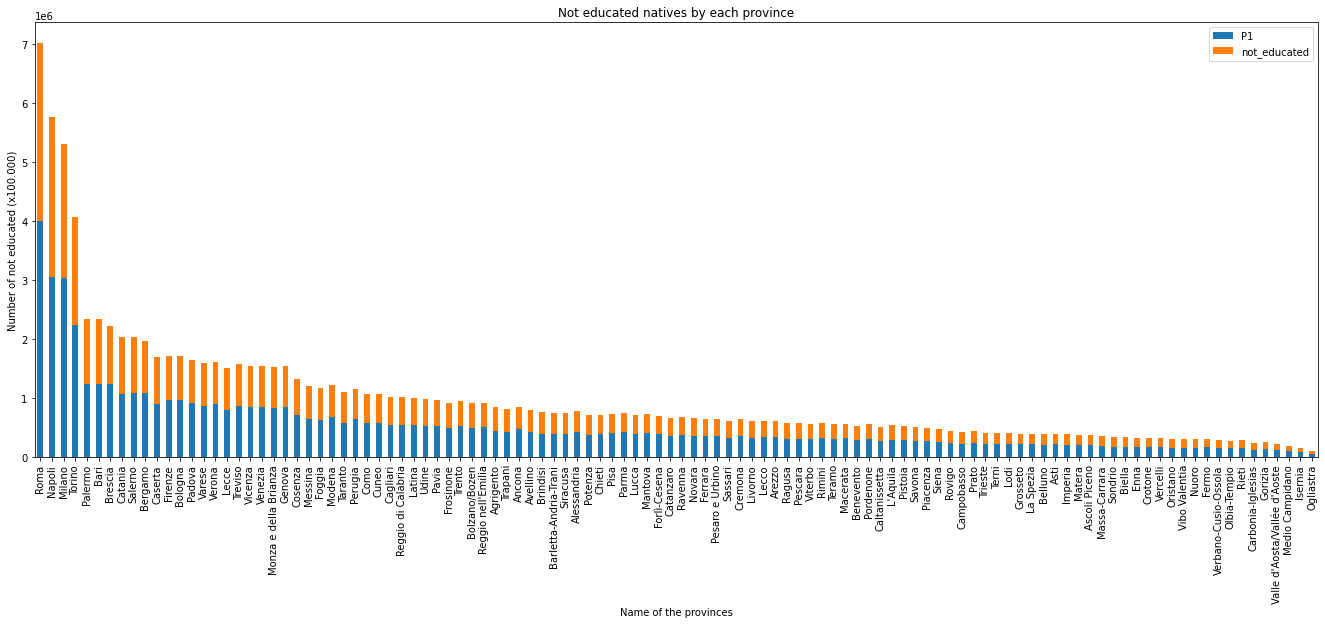

In [458]:
ne_plot = not_educated

ne_plot = ne_plot.set_index('PROVINCIA')
ne = ne_plot.plot.bar(stacked=True,figsize=(23,8))
plt.title('Not educated natives by each province')
plt.xlabel ('Name of the provinces')
plt.ylabel ('Number of not educated (x100.000)');
#P1 - population of province
#not_educated - number of non educated people

 From this graph we can understand that in each province more than residents don't have university education

### <a id='4.3'>3. Understand which gender prevails in a given province at the time of research</a>

In [459]:
##import new module. I used it for comparing two different columns
import numpy as np

## if the statement is true it will give us 1st statement "More males" , if not second "More females"
## the statement df["P2"] > df["P3"] is comparing populations of men and women in each province
comparison_column = np.where(df["P2"] > df["P3"], "More Males", "More Females")

## after this it fill the values to the new column
df["genderDominance"] = comparison_column

##giving labels
gender = df.rename(columns={'PROVINCIA': 'Province','P1': 'Population','P2': 'Males','P3': 'Females'}).head(10)

## in previous code lines above works well. But here it decided not to work at all. Thats why i decided 
## to ignore alias names. 
df[['PROVINCIA','P1','P2','P3','genderDominance']]

## PROVINCIA - Name of the province
## P1 Total population
## P2 Male population
## P3 Female population


,PROVINCIA,P1,P2,P3,genderDominance
0,Alessandria,427229,204983,222246,More Females
1,Asti,217573,105370,112203,More Females
2,Biella,182192,86821,95371,More Females
3,Cuneo,586378,287786,298592,More Females
4,Novara,365559,176361,189198,More Females
...,...,...,...,...,...
105,Nuoro,159197,78154,81043,More Females
106,Ogliastra,57329,28300,29029,More Females
107,Olbia-Tempio,150501,74387,76114,More Females
108,Oristano,163916,80482,83434,More Females


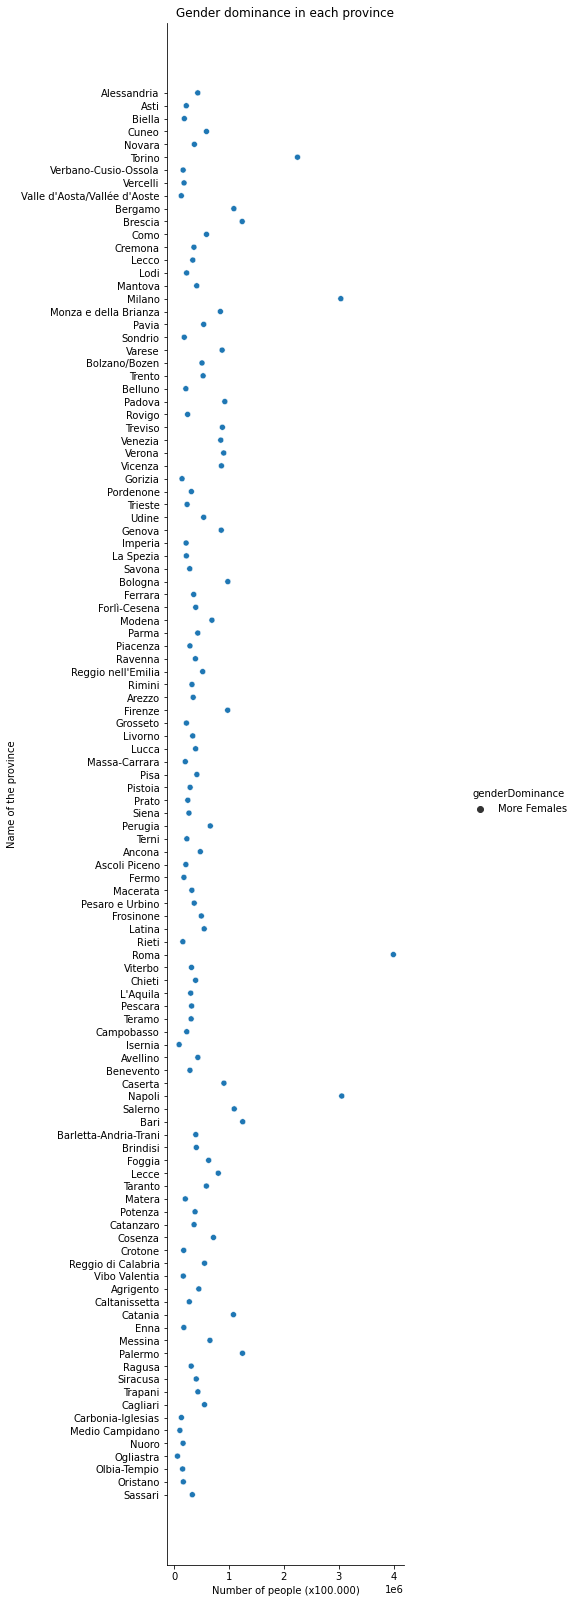

In [460]:
gd = df[['PROVINCIA','P1','P2','P3','genderDominance']]
graph3 = sns.relplot(data=gd, y="PROVINCIA", x="P1", style="genderDominance")
graph3.fig.set_size_inches(10,25)

plt.title('Gender dominance in each province');
plt.ylabel ('Name of the province')
plt.xlabel ('Number of people (x100.000)');

#From the graph below, especially from "hue" we can see that in every 
#province of Italy, at the year 2013, were more females than males


### <a id='4.4'>4. Сalculate the oldest province based on the number of buildings built at the beginning of the last century</a>

In [461]:
## E8 - Buildings Built Before 1919 
col_list5 = ["PROVINCIA","E8"]

## well known for us code for sorting in ascending order
old_buildings = pd.read_csv('ISTAT_census_variables_2011.csv',usecols=col_list5)
top = old_buildings.sort_values(by='E8',ascending=0)

## Table represents us provinces and the amount of the builings. From this we can easily understand that these provinces
## are one of the oldest ones
top.rename(columns={'PROVINCIA': 'Oldest Provincia','E8': 'Buildings Built Before 1919'}).head(10)

,Oldest Provincia,Buildings Built Before 1919
5,Torino,82333
3,Cuneo,54011
0,Alessandria,46598
10,Brescia,41111
48,Firenze,40717
22,Trento,38149
34,Genova,36004
89,Cosenza,35265
51,Lucca,33575
80,Bari,31412


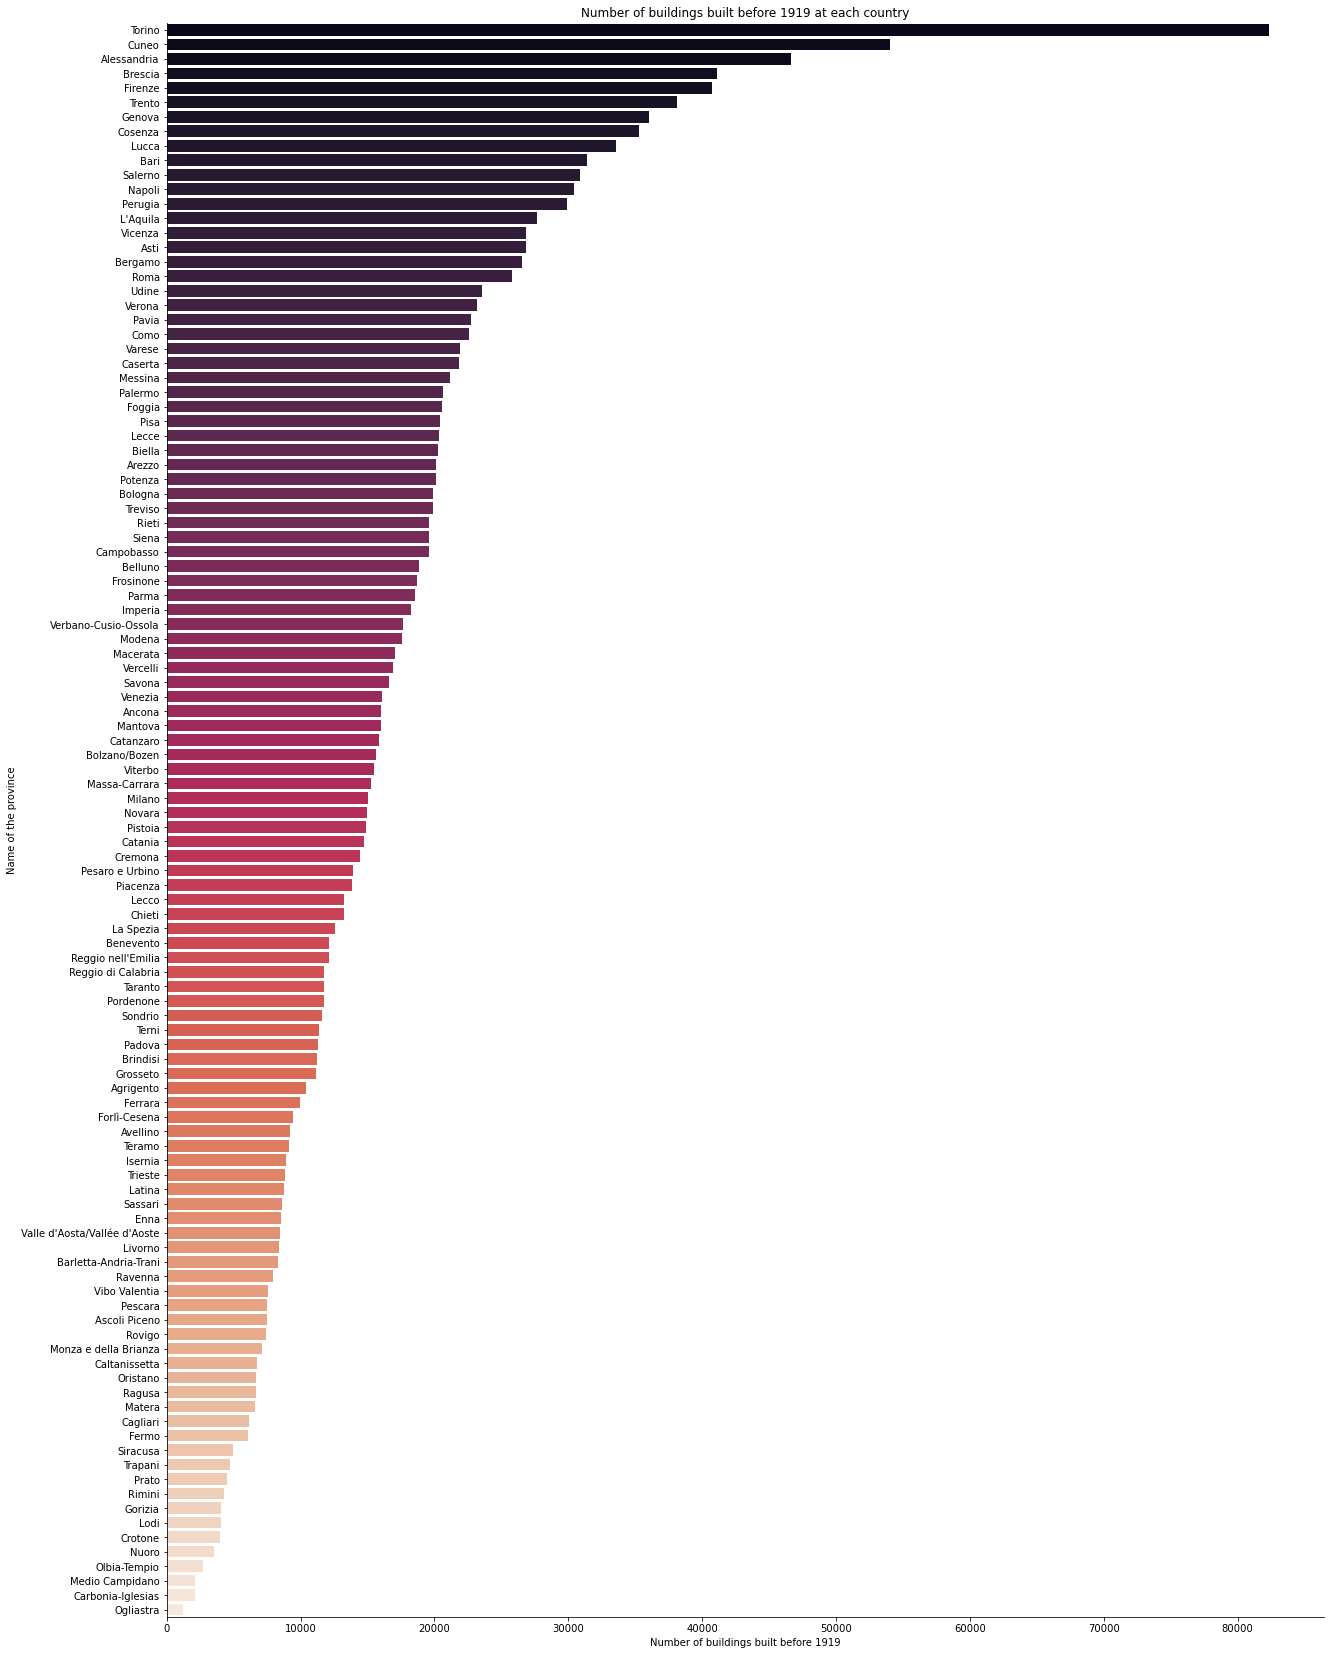

In [462]:
graph4 = sns.catplot(data=top, x="E8", y="PROVINCIA",palette='rocket',kind = "bar");
graph4.fig.set_size_inches(30,25)

plt.title('Number of buildings built before 1919 at each country')
plt.xlabel ('Number of buildings built before 1919')
plt.ylabel ('Name of the province');

In [463]:
# From the graph above, it is clearly seen that Torino may be named as the oldest province in the Italy.

### <a id='4.5'>5. Analyze the material of the houses built and compare them with the material used at the beginning of the last century</a>

In [464]:
## numpy as np

## new comparison which shows us which building material is more used and we can 
## juxtapose it with the building built before 1919.
## E6 Concrede buildings
## E7 Other materials

comparison_column2 = np.where(df["E6"] > df["E7"], "Concrete", "Other")
df["material"] = comparison_column2

material = df.rename(columns={'PROVINCIA': 'Province','E6': 'Concrete buildings','E7': 'Other Material'})
df[['PROVINCIA','E6','E7','material']].head(25)


,PROVINCIA,E6,E7,material
0,Alessandria,18660,17824,Concrete
1,Asti,13920,6309,Concrete
2,Biella,7924,7919,Concrete
3,Cuneo,54969,23616,Concrete
4,Novara,20187,12413,Concrete
5,Torino,129691,37210,Concrete
6,Verbano-Cusio-Ossola,7055,10628,Other
7,Vercelli,9162,6759,Concrete
8,Valle d'Aosta/Vallée d'Aoste,9277,10382,Other
9,Bergamo,79099,30811,Concrete


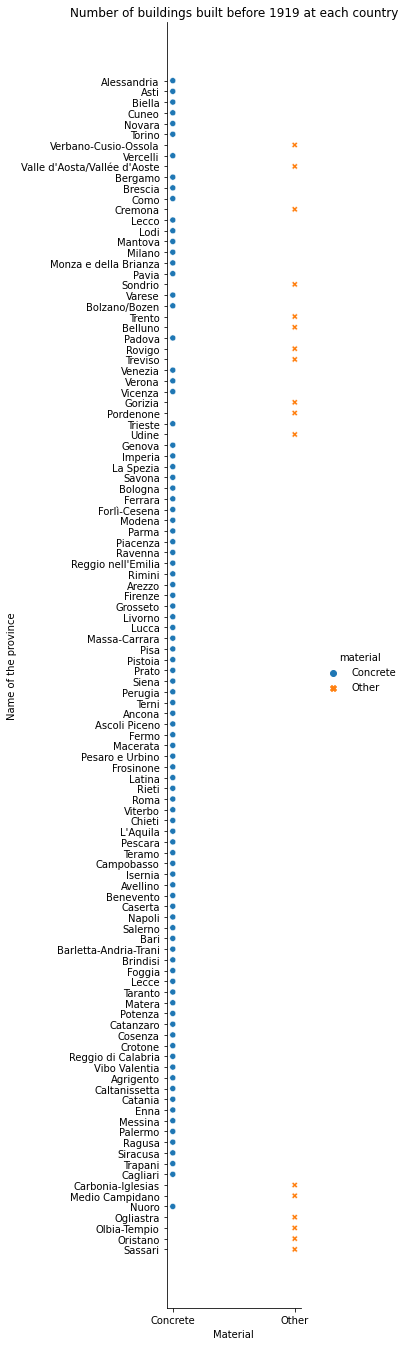

In [465]:
graph5 = sns.relplot(
    data=df,
    x="material", y="PROVINCIA",
    hue="material",style = "material"
);
graph5.fig.set_size_inches(5,20)
plt.title('Number of buildings built before 1919 at each country')
plt.xlabel ('Material')
plt.ylabel ('Name of the province');

And from this graph above, we can understand that there are more concrete buildings in Italy itself than buildings constructed from other materials. But judging by the previous graph, the provinces with old 1919 buildings were raised mainly from concrete.

## <a id='5'> 5. Conclusion </a>

Analyzing the data provided above, we were able to find out that:
1. Rome is the most populous province in Italy, and the province where the least people are
2. All provinces have a fairly large number of people without higher education.
3. In 2013, there were more women than men in every province of Italy.
4. Judging by the number of old buildings, the oldest province in Italy is Torino.
5. Basically in this country, buildings are made of cement, except for such provinces as :Sassari, Oristano, Olbia-Tempio,Ogliastra, Medio Campidano, Carbonia-Iglesias, Udine,Pordenone, Gorizia, Treviso, Rovigo, Belluno, Trento,Cremona, Sondrio, Verbano-Cusio-Ossola, Verbano-Cusio-Ossola. 

Unfortunately, this does not allow us to find out whether the buildings before 1919 were idle mainly from wood, stones, etc.

While working on this project I got an unforgettable experience with python and jupyter notebook. Now I know which datasets can be called convenient and you shouldn't choose them just because of their size. Dataset did not have any missing or null values, and also I understood that it is better to give columns alias name, instead of renaming them in the begining, just because their names are too long. In addition, on the stage of data preparation, i understood that it is better to select and add to new dataFrames or column lists useful and needed columns rather than drop them (delete) just because of their amount.

I learned how to compose worthy and interesting questions. I am sure this experience will help me in the future projects.

If I ever improve this project, I would add webscrapping with the map, using PlotlyLibrary and even cooler libraries.